# Exercise 17 - Fourier analysis and Milankovitch cycles
*Andrew Valentine, Louis Moresi, louis.moresi@anu.edu.au - With thanks to Dr Katharine Grant*

The Excel spreadsheet `RSL_data.xlsx` contains information about relative sea level over the last 500,000 years.

**&#10148; Use the Pandas library to read the data from this spreadsheet and plot the relative sea level over time.**

You may wish to 'flip' the x-axis so that the most recent measurements are on the right-hand side, as usual. To do this, you can use the following command:
```python
ax = plt.gca()    # Get current axes
ax.invert_xaxis() # Flip x
```

In [ ]:
# Try it here!


This signal appears to have strong periodicities. To understand these better, we can analyse the signal using a Fourier transform. A range of different Fourier transform functions are available within `np.fft`; since our signal is purely real (i.e., can be expressed without using complex numbers), we will use `np.fft.rfft`.

`np.fft.rfft` assumes that our time samples are all equally-spaced. This is not the case for the dataset within `RSL_data.xlsx`. We therefore need to interpolate the signal onto a regular set of points.

** &#10148; Using the function `np.interp`, interpolate the data onto a regular set of points.** Plot your interpolated time series and verify that it looks the same as the original.

** &#10148; Subtract the mean from this interpolated data.**

In [ ]:
# Try it here!


Given a time series in an array `timeSeries`, we can generate a spectrum by calling
```python
npoints = <?>
spectrum = np.fft.rfft(timeSeries,npoints,norm='ortho')
```
The variable `npoints` should be set to a value equal to or greater than `len(timeSeries)`. The larger this number, the 'cleaner' the spectrum will appear, but the calculations will be slower. The Fast Fourier Transform is most efficient if `npoints` is a power of two. The `norm='ortho'` argument ensures that the Fourier transform is properly normalised.

The ordering of the points in the spectrum is counter-intuitive, and governed by efficiency considerations. Fortunately, one can use the function
```python
frequencies = np.fft.rfftfreq(npoints,timeStep)
```
to obtain an array which gives the frequency of each spectral point. Here, `npoints` is identical to the `npoints` used in `np.fft.rfft`; `timeStep` should be set to the time-spacing between each point in timeSeries.

** &#10148; Obtain a spectrum and corresponding array of frequencies for your interpolated dataset. **

In [ ]:
# Try it here!


If you print your spectrum, you will see it contains numbers like `1.323+0.25j`. This is how Python represents complex numbers. When plotting spectra, it is most common to plot the 'power spectrum', $P(\omega) = |f(\omega)|^2 = f^*(\omega)f(\omega)$, where the asterisk ($*$) denotes a 'complex conjugate'. This is implemented in NumPy as the `conj()` function. Therefore, to obtain a power spectrum from the array `spectrum` produced by `np.fft.rfft`, you can use
```python
power = np.real(spectrum.conj()*spectrum)
```

** &#10148; Plot the power spectrum of your signal. **

In [ ]:
# Try it here!


Hopefully you now see a number of clear peaks, which correspond to periodicities within the dataset. In particular, you should be able to see a number of peaks relating to the Milankovitch cycle - variations in Earth's climatic conditions that arise from variations in the Earth's orbit around the sun. This has strong components at periods of around 23,000 years, 41,000 years, and 100,000 years.

** &#10148; Modify your plot to reproduce this figure. **

Remember that period = 1/frequency !

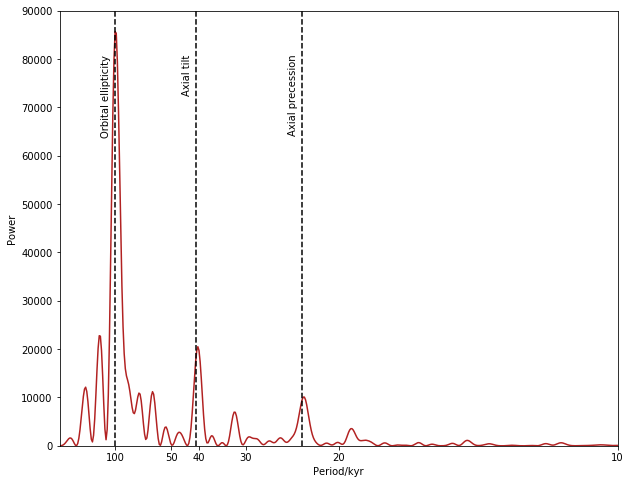

In [3]:
%matplotlib inline
import sealevel
sealevel.plot_Milankovitch("RSL_data.xlsx")

In [ ]:
# Try it here!


## Filtering

Most natural signals have energy across a broad range of frequencies. However, we are often interested in only a subset of this frequency band. To isolate the time series arising from this subset, we can employ a frequency-domain filter.

Filtering and signal processing are complex topics, and we will not go into any significant detail in this course. However, at a basic level, filtering can be understood as a frequency-dependent rescaling of the spectrum. The simplest filter imaginable might be:
```python 
cutoff = <?>
filt = np.where(freqs > cutoff,1,0)
```
where freqs is the array produced by `np.fft.rfftfreqs`, as above. `filt` is now an array which contains the value 1 for frequencies *above* some cutoff frequency, and 0 below this point. This is known as a 'high-pass' filter, as it leaves high-frequncy signals unchanged, but stops low-frequency ones. We can then do:
```python
filtered_spectrum = spectrum * filt
```
** &#10148; Make this filter and plot the spectrum. **




In [ ]:
# Try it here!


We can then use an *inverse* Fourier transform to convert our filtered spectrum back into a time series. To do this, you use the function `np.fft.irfft`:
```python
filtered_series = np.fft.irfft(filtered_spectrum, npoints,norm='ortho')
```
where `npoints` is exactly the same variable as you used for the *forward* transform.

** &#10148; Plot the filtered time series. **

In [ ]:
# Try it here!


You may notice that this doesn't seem to give very good results. A sharp cutoff in a filter tends to create lots of 'ringing' - an effect known as [Gibb's Phenomenon](https://en.wikipedia.org/wiki/Gibbs_phenomenon). We will get much better results if we allow a smooth transition between the 'stop-band' and the 'pass-band'. One way to do this is to create a 'cosine high-pass' filter, which is described by the following formula as a function of frequency ( $f$ ):
$$ F(f) =\begin{cases}0 &f<f_\mathrm{lo}\\\frac{1}{2}\left[1-\cos\left(\pi\cdot\frac{f-f_\mathrm{lo}}{f_\mathrm{hi}-f_\mathrm{lo}}\right)\right]&f_\mathrm{lo}<f<f_\mathrm{hi}\\1&f>f_\mathrm{hi}\end{cases}$$
Here, $f_\mathrm{lo}$ and $f_\mathrm{hi}$ define a range of frequencies which are attenuated, but not stopped completely.

** &#10148; Write a `cosineHighPass()` function and plot its output. Then apply it to your time series, and explore how it performs as you vary $f_\mathrm{lo}$ and $f_\mathrm{hi}$. **

In [ ]:
#Try it here!


A cosine low-pass filter is very similar, except it lets *low* frequencies through unchanged, and stops high frequencies.

** &#10148; Create a `cosineLowPass()` function and explore its performance. **

In [ ]:
# Try it here!


Sometimes, we want to stop both very-low and very-high frequency signals, while preserving the middle band. This can be achieved by using a 'band-pass' filter. One way to achieve this is to simply combine (multiply) the output from a low-pass and a high-pass filter. Clearly, the cutoff for the high-pass filter must be below the cutoff for the low-pass filter if this is to succeed.

** &#10148; Create a `cosineBandPass()` function and explore its performance. **

In [ ]:
# Try it here!


Alternatively, we might choose to use a Gaussian-shaped filter:

$$ F(f) = \exp\left[-\frac{(f-f_\mathrm{cen})^2}{2 w^2}\right] $$

where $f_\mathrm{cen}$ defines the central point of the pass-band, and $w$ controls its width.

** &#10148; Create a `gaussianBandPass()` function and explore its performance. **

In [ ]:
# Try it here!
